In [1]:
!apt-get update
!apt-get install -y mysql-server
!service mysql start

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [81.0 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,307 kB]
Get:14 https://r2u.sta

In [2]:
!mysql -e "CREATE DATABASE Hollywood_vfx;"


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Hollywood_movies.sql to Hollywood_movies.sql


In [4]:
!mysql -D Hollywood_vfx < Hollywood_movies.sql

In [5]:
!pip install pymysql sqlalchemy
import pandas as pd
from sqlalchemy import create_engine

# Use mysql command to update the user table and flush privileges
!mysql -e "USE mysql; UPDATE user SET authentication_string='', plugin='mysql_native_password' WHERE User='root' AND Host='localhost';"
!mysql -e "FLUSH PRIVILEGES;"
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED BY '';" # Keep this as an alternative method

# Connect to MySQL (root user, no password for Colab local instance) using 127.0.0.1
engine = create_engine("mysql+pymysql://root:@127.0.0.1/Hollywood_vfx")
df = pd.read_sql("SELECT * FROM movies", engine)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.1 MB/s eta 0:00:00


In [22]:
#importing Libraries
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df.head()

,movie_id,title,release_date,release_year,genre,budget,revenue,imdb_rating,vfx_flag,roi
0,1,Avatar,2009-12-10,2009,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2787965087,7.2,1,10.763600
1,2,Pirates of the Caribbean: At World's End,2007-05-19,2007,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000,961000000,6.9,1,2.203330
2,3,Spectre,2015-10-26,2015,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000,880674609,6.3,1,2.594590
3,4,The Dark Knight Rises,2012-07-16,2012,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000,1084939099,7.6,1,3.339760
4,5,John Carter,2012-03-07,2012,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000,284139100,6.1,1,0.092843


In [8]:
df.shape

(666, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      666 non-null    int64  
 1   title         666 non-null    object 
 2   release_date  666 non-null    object 
 3   release_year  666 non-null    int64  
 4   genre         666 non-null    object 
 5   budget        666 non-null    int64  
 6   revenue       666 non-null    int64  
 7   imdb_rating   666 non-null    float64
 8   vfx_flag      666 non-null    int64  
 9   roi           666 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 52.2+ KB


In [10]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

In [11]:
df.isna().sum()

,0
movie_id,0
title,0
release_date,0
release_year,0
genre,0
budget,0
revenue,0
imdb_rating,0
vfx_flag,0
roi,0


In [12]:
df.describe()

,movie_id,release_date,release_year,budget,revenue,imdb_rating,vfx_flag,roi
count,666.00000,666,666.000000,6.660000e+02,6.660000e+02,666.000000,666.000000,666.000000
mean,355.50000,2009-12-25 01:56:45.405405440,2009.454955,1.627185e+08,5.233815e+08,6.427477,0.959459,2.200433
min,1.00000,1990-06-01 00:00:00,1990.000000,1.500000e+07,0.000000e+00,4.200000,0.000000,-1.000000
25%,167.25000,2007-05-17 00:00:00,2007.000000,1.350000e+08,2.890478e+08,5.900000,1.000000,0.952119
50%,366.50000,2010-09-20 00:00:00,2010.000000,1.500000e+08,4.284797e+08,6.400000,1.000000,1.831595
75%,532.75000,2013-11-15 00:00:00,2013.000000,1.850000e+08,7.106446e+08,7.000000,1.000000,3.200850
max,699.00000,2016-08-02 00:00:00,2016.000000,3.800000e+08,2.787965e+09,8.200000,1.000000,10.763600
std,205.31003,NaN,4.915091,4.457628e+07,3.501046e+08,0.757466,0.197371,1.812491


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      666 non-null    int64         
 1   title         666 non-null    object        
 2   release_date  666 non-null    datetime64[ns]
 3   release_year  666 non-null    int64         
 4   genre         666 non-null    object        
 5   budget        666 non-null    int64         
 6   revenue       666 non-null    int64         
 7   imdb_rating   666 non-null    float64       
 8   vfx_flag      666 non-null    int64         
 9   roi           666 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 52.2+ KB


In [14]:
df.duplicated().any()


np.False_

# **Do VFX movies have higher average budgets than non-VFX?**

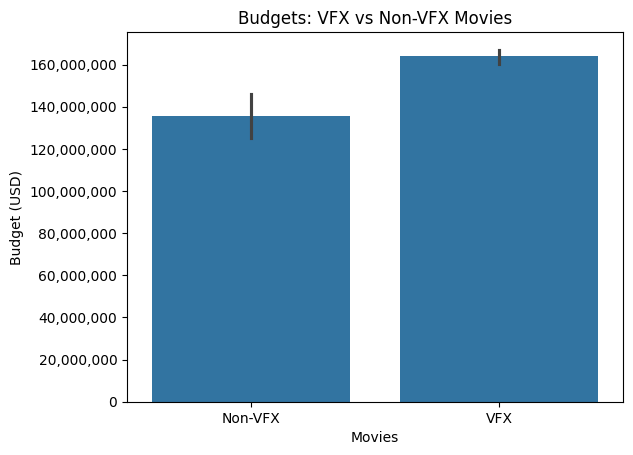

In [15]:
import matplotlib.ticker as mticker
ax = sns.barplot(x='vfx_flag', y='budget', data=df)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks([0,1], ['Non-VFX', 'VFX'])
plt.title("Budgets: VFX vs Non-VFX Movies")
plt.xlabel("Movies")
plt.ylabel("Budget (USD)")
plt.show()

# **ROI distribution: VFX vs Non-VFX**

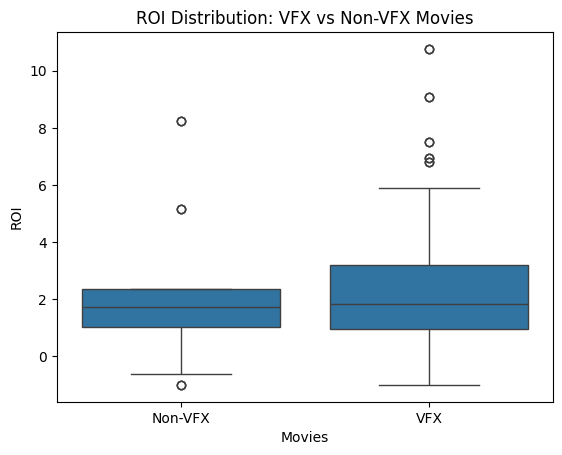

In [16]:
sns.boxplot(x='vfx_flag', y='roi', data=df)
plt.xticks([0,1], ['Non-VFX','VFX'])
plt.title("ROI Distribution: VFX vs Non-VFX Movies")
plt.xlabel("Movies")
plt.ylabel("ROI")
plt.show()

# **What are the Top 10 highest-grossing VFX movies?**

In [17]:
vfx_df = df[df['vfx_flag'] == 1]

top10_vfx = (vfx_df[vfx_df['revenue'] > 0]
             .drop_duplicates(subset=['title'])
             .sort_values(by='revenue', ascending=False)
             .head(10))

/tmp/ipython-input-3593304979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='revenue', y='title', data=top10_vfx, palette="viridis")


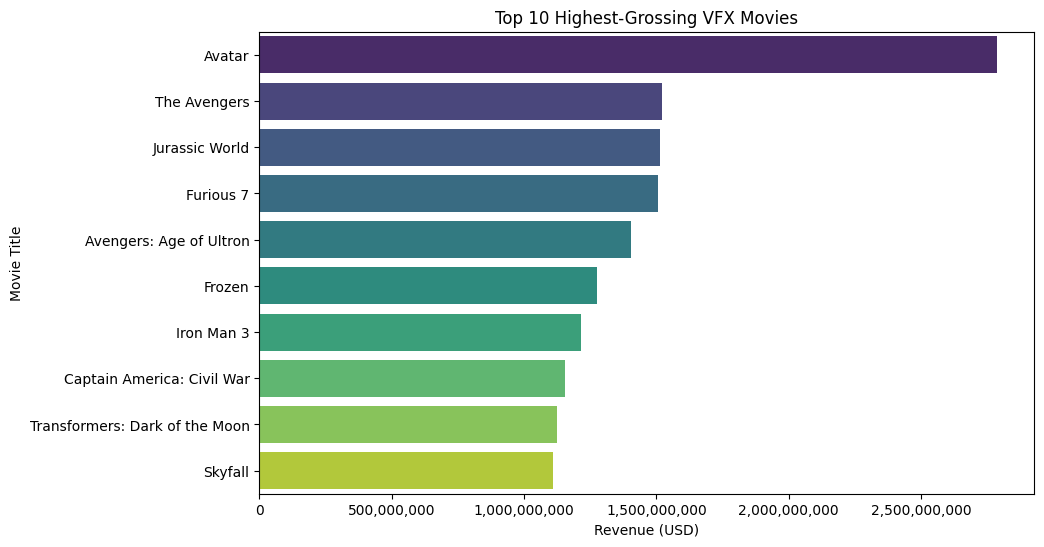

In [18]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='revenue', y='title', data=top10_vfx, palette="viridis")

# Format x-axis with commas instead of scientific notation
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Top 10 Highest-Grossing VFX Movies")
plt.xlabel("Revenue (USD)")
plt.ylabel("Movie Title")
plt.show()


# **How has the number of VFX movies changed over time?**

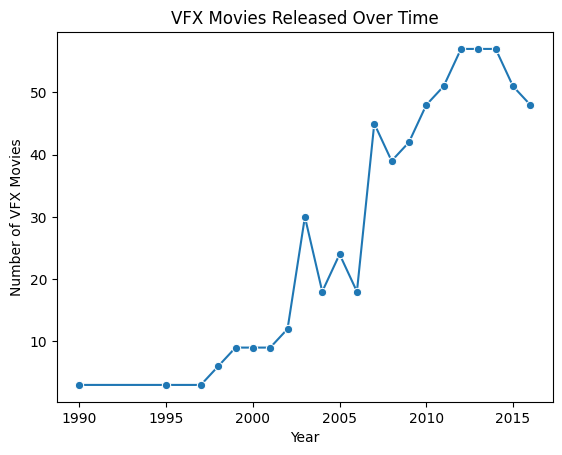

In [19]:
vfx_trend = df[df['vfx_flag']==1].groupby('release_year').size().reset_index(name='count')

sns.lineplot(x='release_year', y='count', data=vfx_trend, marker='o')
plt.title("VFX Movies Released Over Time")
plt.xlabel("Year")
plt.ylabel("Number of VFX Movies")
plt.show()

# **Are VFX movies growing more profitable over time?**

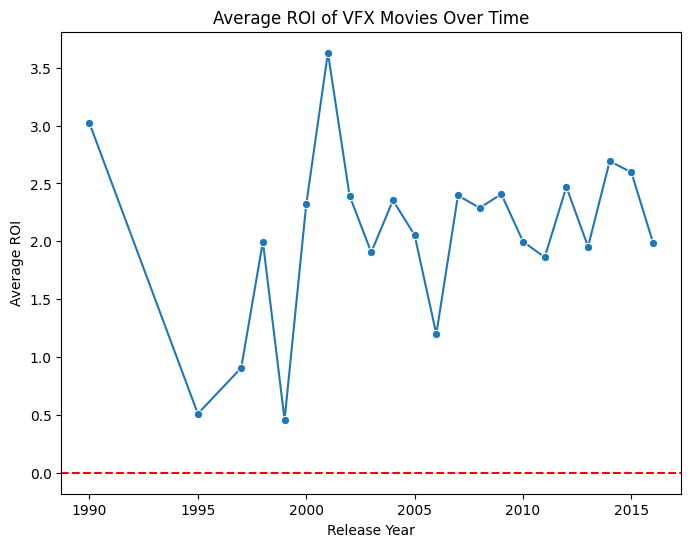

In [20]:
vfx_df = df[df['vfx_flag']==1]

# Group by release_year and calculate average ROI
vfx_profit_trend = vfx_df.groupby('release_year')['roi'].mean().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.lineplot(x='release_year', y='roi', data=vfx_profit_trend, marker='o')
plt.title("Average ROI of VFX Movies Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average ROI")
plt.axhline(0, color='red', linestyle='--')  # line for break-even
plt.show()


# **Does budget strongly correlate with revenue for VFX films?**

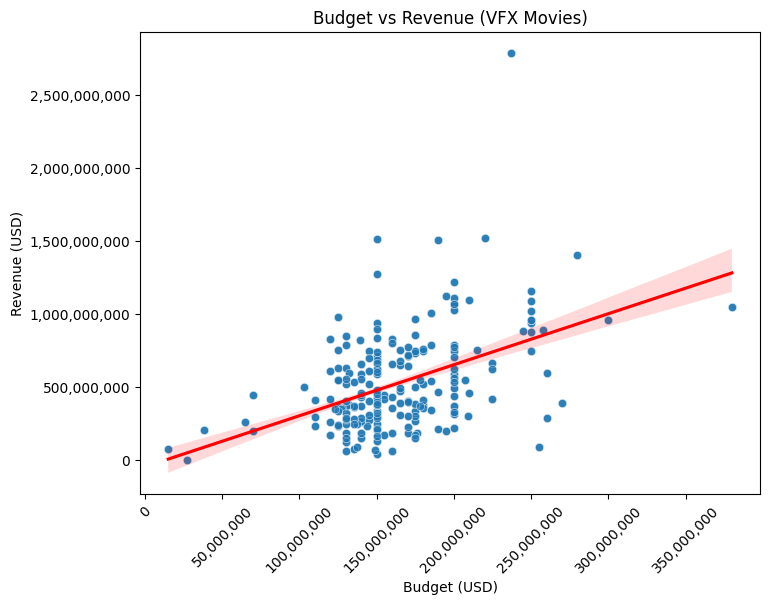

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x='budget', y='revenue', data=vfx_df, alpha=0.6, ax=ax)
sns.regplot(x='budget', y='revenue', data=vfx_df, scatter=False, color="red", ax=ax)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{int(y):,}'))

plt.title("Budget vs Revenue (VFX Movies)")
plt.xlabel("Budget (USD)")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()